# Task
DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING


Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. We will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

Dataset:

Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.

Tasks:
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.



## Data loading:

Load the "adult_with_headers.csv" dataset.



Load the dataset and display the first few rows along with its shape to verify successful loading.



In [3]:
!pip uninstall -y numpy pandas
!pip install numpy==1.24.4 pandas==1.5.3


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 1.5.3
Uninstalling pandas-1.5.3:
  Successfully uninstalled pandas-1.5.3
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 94.9 MB/s eta 0:00:00
Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, b

In [1]:
import pandas as pd

df = pd.read_csv('adult_with_headers.csv')
display(df.head())
print(df.shape)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 15)


## Data exploration


Explore the loaded dataset.



Explore the dataset by generating descriptive statistics, identifying missing values, examining data types, analyzing categorical features, and visualizing key features' distributions.



,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

,workclass
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


,education
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646
Prof-school,576


,marital_status
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


,occupation
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597
Handlers-cleaners,1370


,relationship
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


,race
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


,sex
Male,21790
Female,10771


,native_country
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


,income
<=50K,24720
>50K,7841


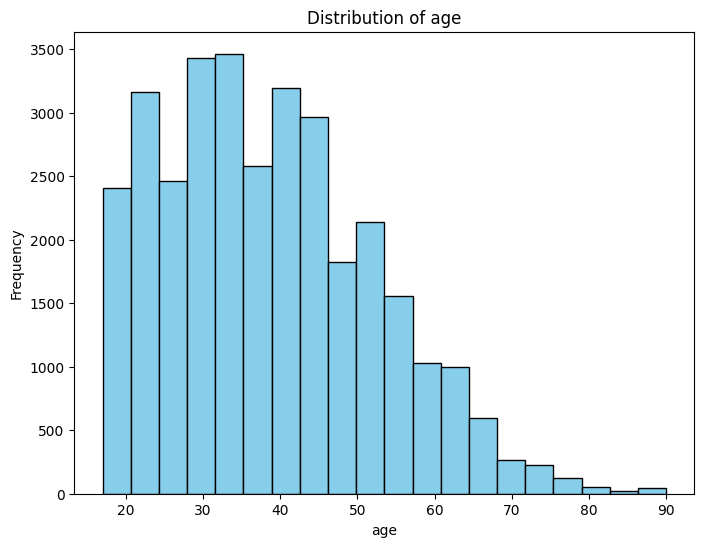

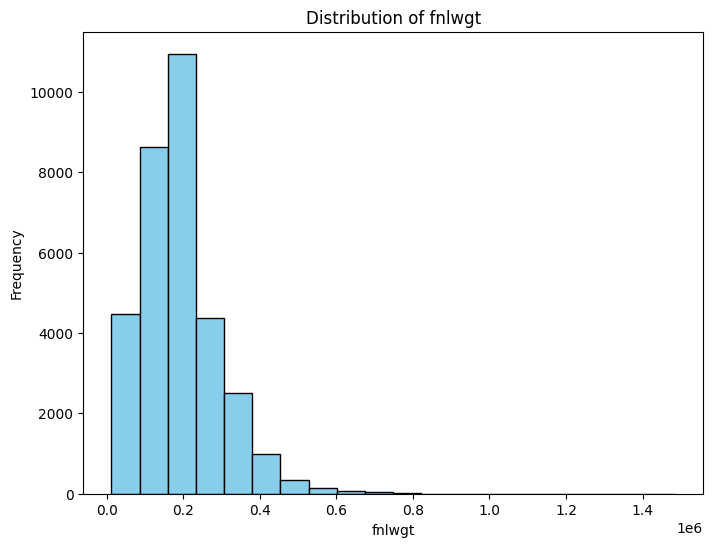

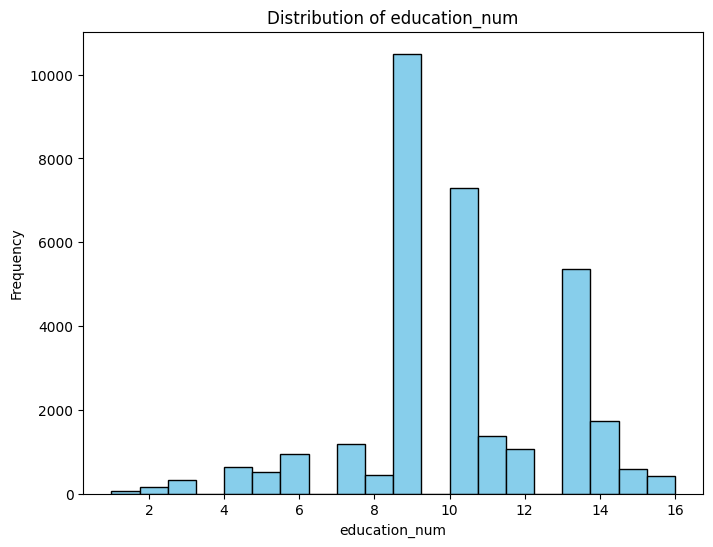

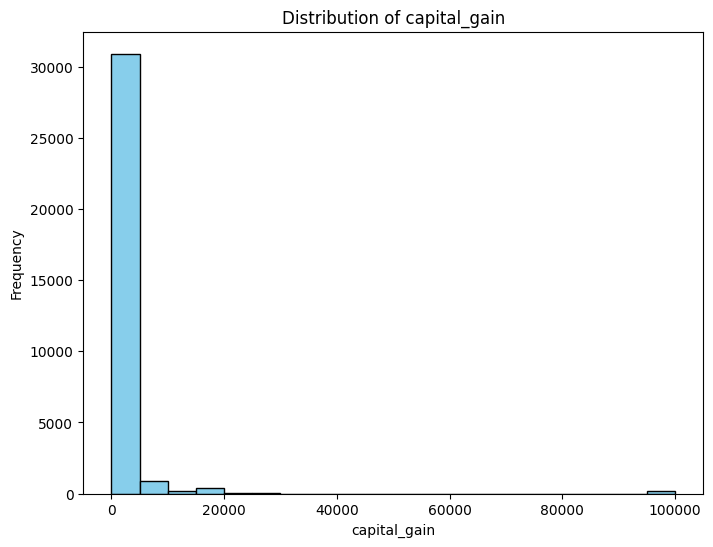

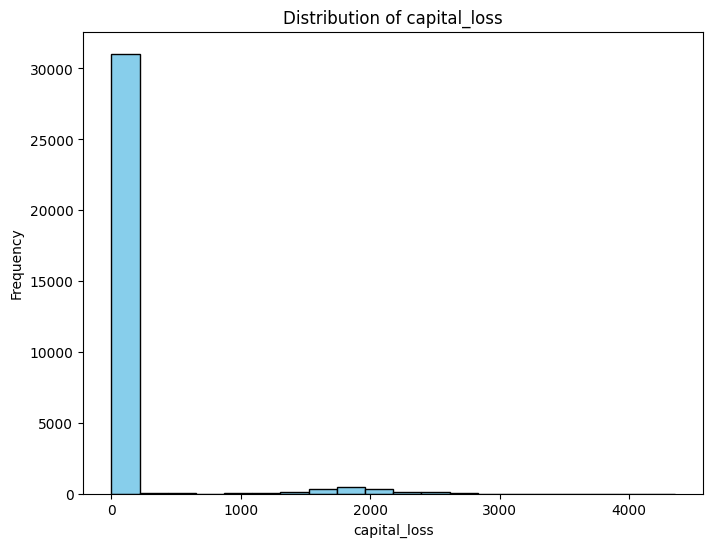

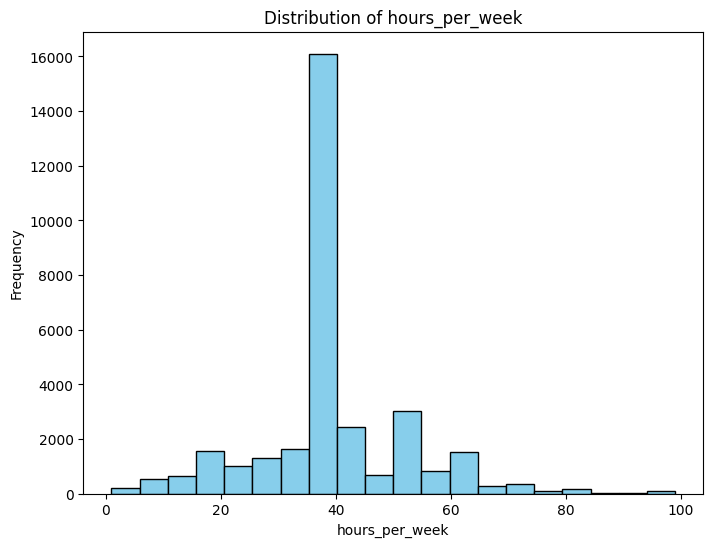

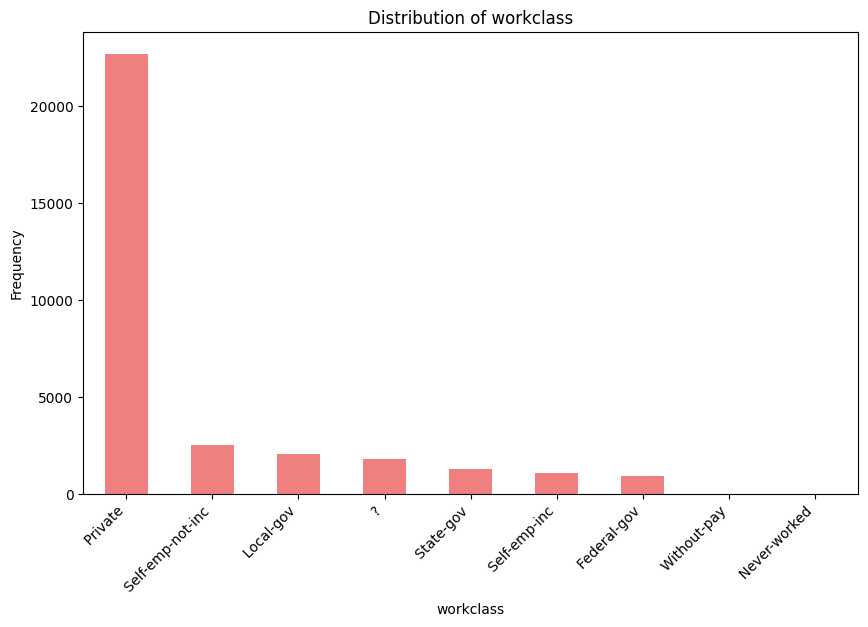

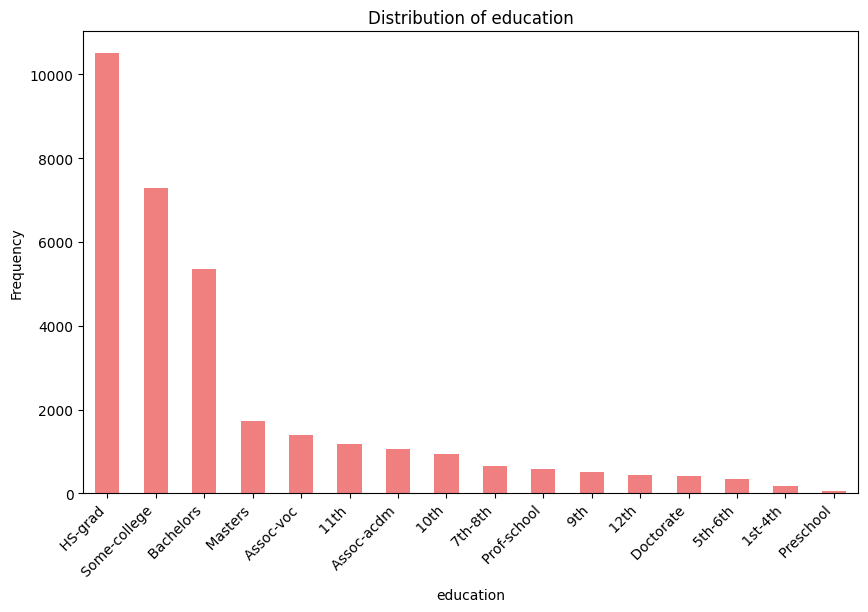

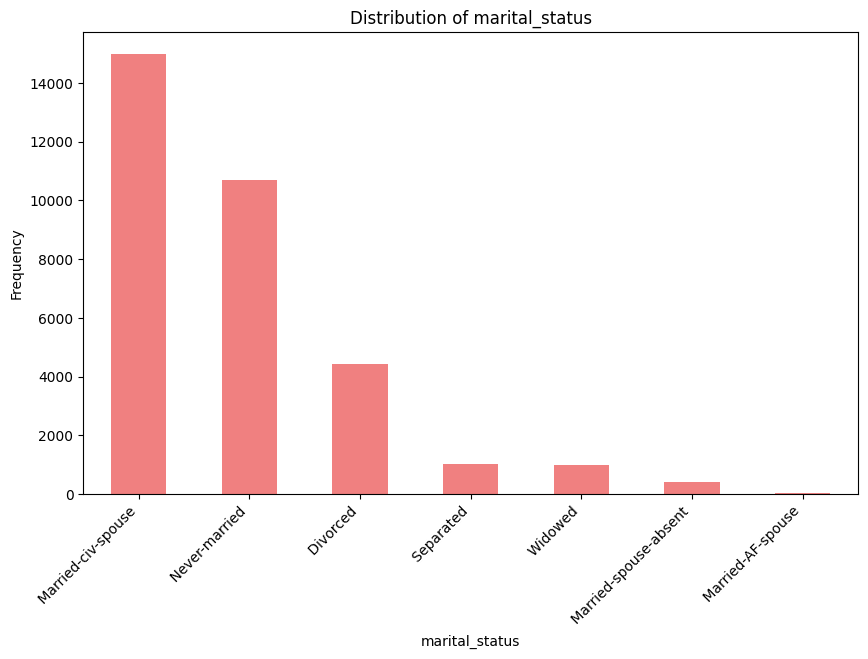

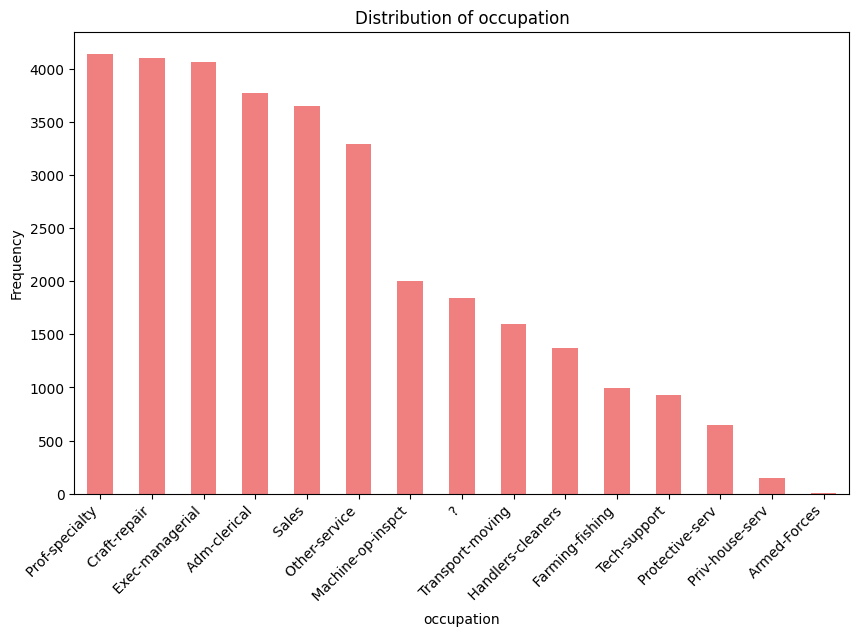

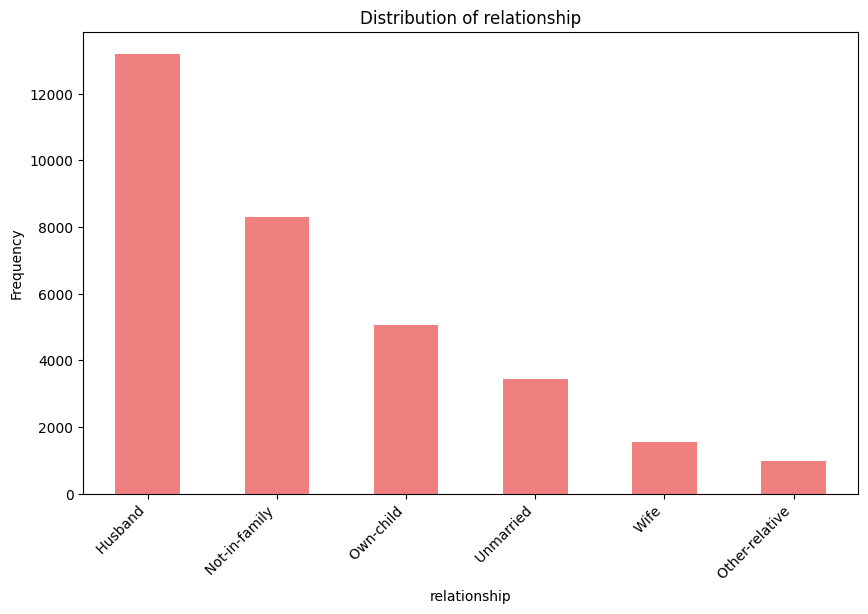

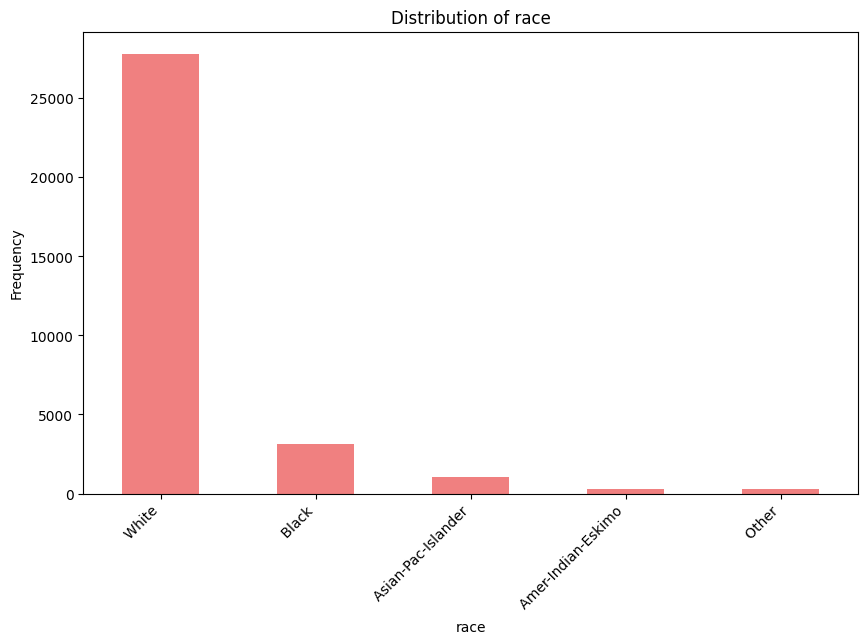

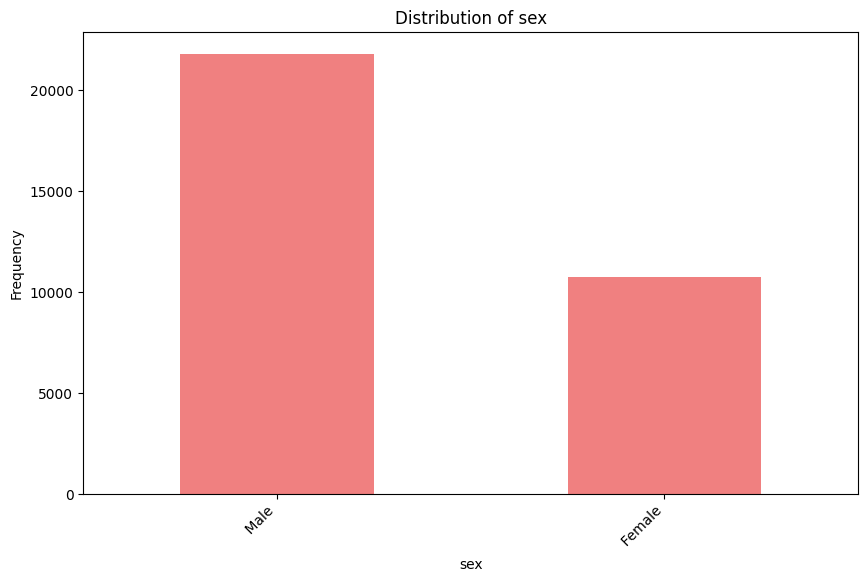

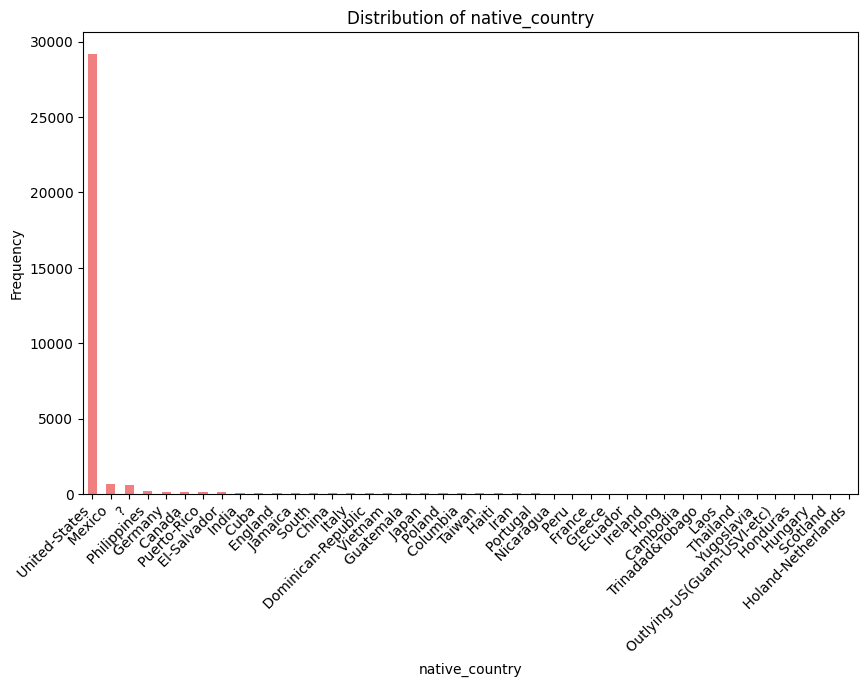

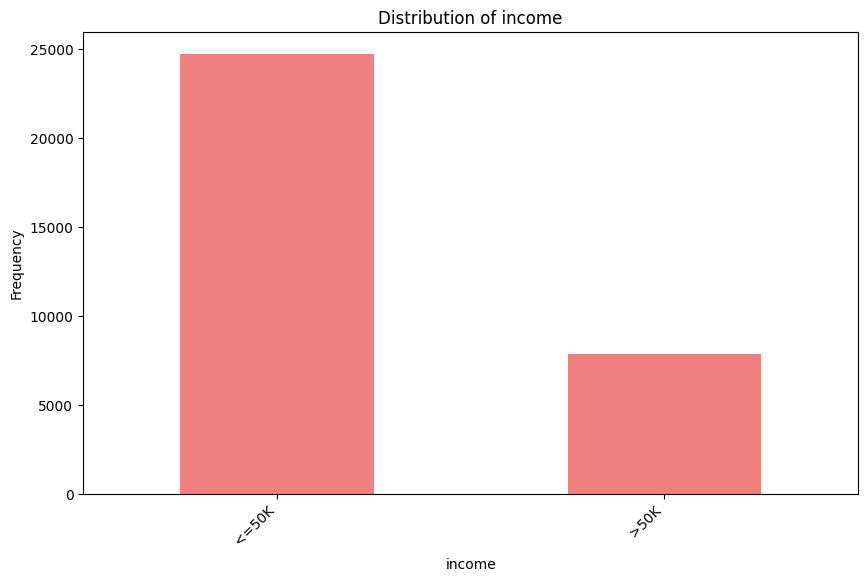

In [2]:
# Generate descriptive statistics for numerical features
display(df.describe())

# Identify missing values
display(df.isnull().sum())

# Examine data types
display(df.info())

# Analyze categorical features
for col in df.select_dtypes(include=['object']):
    if col != 'income':
        display(df[col].value_counts())
    else:
        display(df['income'].value_counts())

# Visualize numerical features' distributions
import matplotlib.pyplot as plt
for col in df.select_dtypes(include=['int64']):
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize categorical features' distributions
for col in df.select_dtypes(include=['object']):
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar', color='lightcoral')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Data cleaning


Handle missing values in the dataset.


Replace '?' with np.nan and handle missing values.



In [3]:
import numpy as np

# Replace '?' with np.nan
for col in ['workclass', 'occupation', 'native_country']:
    df[col] = df[col].replace(' ?', np.nan)

# Handle missing values
for col in ['workclass', 'occupation', 'native_country']:
    if df[col].dtype == 'object':
        # Impute with the most frequent category for categorical features
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # Impute with the median for numerical features (if any)
        df[col].fillna(df[col].median(), inplace=True)
display(df.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0



The previous code block had a warning about chained assignment.  I will rewrite the code to avoid this and verify the imputation.



In [4]:
# Handle missing values
for col in ['workclass', 'occupation', 'native_country']:
    if df[col].dtype == 'object':
        # Impute with the most frequent category for categorical features
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # Impute with the median for numerical features (if any)
        df[col] = df[col].fillna(df[col].median())
display(df.isnull().sum())

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


## Data wrangling


Apply standard scaling and min-max scaling to numerical features.



Apply standard scaling and min-max scaling to the numerical features in the dataframe.



In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical features
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# Apply standard scaling
scaler = StandardScaler()
for feature in numerical_features:
    df[f'{feature}_standard'] = scaler.fit_transform(df[[feature]])

# Apply min-max scaling
scaler = MinMaxScaler()
for feature in numerical_features:
    df[f'{feature}_minmax'] = scaler.fit_transform(df[[feature]])

# Document the rationale for choosing each scaling method
print("Scaling Rationale:")
for feature in numerical_features:
    print(f"- {feature}: Both standard scaling and min-max scaling were applied. "
          f"Standard scaling centers the data around zero with a unit standard deviation, "
          f"which is beneficial for algorithms sensitive to feature magnitudes. "
          f"Min-max scaling transforms features to a specific range (0 to 1), "
          f"which can be useful for algorithms that are distance-based or where the range matters. "
          f"Applying both allows flexibility for different models.")

display(df.head())

Scaling Rationale:
- age: Both standard scaling and min-max scaling were applied. Standard scaling centers the data around zero with a unit standard deviation, which is beneficial for algorithms sensitive to feature magnitudes. Min-max scaling transforms features to a specific range (0 to 1), which can be useful for algorithms that are distance-based or where the range matters. Applying both allows flexibility for different models.
- fnlwgt: Both standard scaling and min-max scaling were applied. Standard scaling centers the data around zero with a unit standard deviation, which is beneficial for algorithms sensitive to feature magnitudes. Min-max scaling transforms features to a specific range (0 to 1), which can be useful for algorithms that are distance-based or where the range matters. Applying both allows flexibility for different models.
- education_num: Both standard scaling and min-max scaling were applied. Standard scaling centers the data around zero with a unit standard devi

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,education_num_standard,capital_gain_standard,capital_loss_standard,hours_per_week_standard,age_minmax,fnlwgt_minmax,education_num_minmax,capital_gain_minmax,capital_loss_minmax,hours_per_week_minmax
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,1.134739,0.148453,-0.21666,-0.035429,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,1.134739,-0.145920,-0.21666,-2.222153,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,-0.420060,-0.145920,-0.21666,-0.035429,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,-1.197459,-0.145920,-0.21666,-0.035429,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,1.134739,-0.145920,-0.21666,-0.035429,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


## Data wrangling

Apply One-Hot Encoding to categorical features with fewer than 5 categories and Label Encoding to those with 5 or more categories.



Apply One-Hot Encoding to categorical features with less than 5 unique values and Label Encoding to those with 5 or more unique values.



In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')  # Exclude the target variable

# Apply encoding techniques
encoded_features = []
for col in categorical_cols:
    if df[col].nunique() < 5:
        # One-Hot Encoding
        encoded = pd.get_dummies(df[col], prefix=col, drop_first=True)
        encoded_features.append(encoded)
        print(f"The `{col}` feature was one-hot encoded because it has {df[col].nunique()} unique values. "
              f"One-hot encoding is suitable for this feature because it avoids imposing an ordinal relationship between categories. "
              f"However, it increases the dimensionality of the dataset.")
    else:
        # Label Encoding
        le = LabelEncoder()
        encoded = pd.DataFrame(le.fit_transform(df[col]), columns=[f'{col}_encoded'])
        encoded_features.append(encoded)
        print(f"The `{col}` feature was label encoded because it has {df[col].nunique()} unique values. "
              f"Label encoding is suitable for high-cardinality categorical features. "
              f"However, it may introduce an ordinal relationship where none exists, potentially affecting model performance.")

# Concatenate encoded features and remove original columns
df_encoded = pd.concat([df] + encoded_features, axis=1)
df_encoded = df_encoded.drop(columns=categorical_cols)
display(df_encoded.head())

The `workclass` feature was label encoded because it has 8 unique values. Label encoding is suitable for high-cardinality categorical features. However, it may introduce an ordinal relationship where none exists, potentially affecting model performance.
The `education` feature was label encoded because it has 16 unique values. Label encoding is suitable for high-cardinality categorical features. However, it may introduce an ordinal relationship where none exists, potentially affecting model performance.
The `marital_status` feature was label encoded because it has 7 unique values. Label encoding is suitable for high-cardinality categorical features. However, it may introduce an ordinal relationship where none exists, potentially affecting model performance.
The `occupation` feature was label encoded because it has 14 unique values. Label encoding is suitable for high-cardinality categorical features. However, it may introduce an ordinal relationship where none exists, potentially affec

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,age_standard,fnlwgt_standard,education_num_standard,...,capital_loss_minmax,hours_per_week_minmax,workclass_encoded,education_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_ Male,native_country_encoded
0,39,77516,13,2174,0,40,<=50K,0.030671,-1.063611,1.134739,...,0.0,0.397959,6,9,4,0,1,4,1,38
1,50,83311,13,0,0,13,<=50K,0.837109,-1.008707,1.134739,...,0.0,0.122449,5,9,2,3,0,4,1,38
2,38,215646,9,0,0,40,<=50K,-0.042642,0.245079,-0.420060,...,0.0,0.397959,3,11,0,5,1,4,1,38
3,53,234721,7,0,0,40,<=50K,1.057047,0.425801,-1.197459,...,0.0,0.397959,3,1,2,5,0,2,1,38
4,28,338409,13,0,0,40,<=50K,-0.775768,1.408176,1.134739,...,0.0,0.397959,3,9,2,9,5,2,0,4


## Feature engineering


Create new features and apply transformations to existing ones.



Create two new features: combined capital gain and loss, and the interaction between education level and hours per week.



In [7]:
# Create combined capital gain and loss feature
# Rationale: Combining capital gain and loss might capture the net effect of capital activities on income.
# Using addition seems the most straightforward way to represent the total impact from both gains and losses.
df_encoded['capital_net'] = df_encoded['capital_gain'] + df_encoded['capital_loss']
print("Created 'capital_net' feature by adding 'capital_gain' and 'capital_loss'.")

# Create interaction between education level and hours per week
# Rationale: Higher education coupled with more hours worked per week could indicate a strong potential for higher income.
# Multiplication is a common way to represent interaction where the effect of one variable is scaled by the other.
df_encoded['education_hours_interaction'] = df_encoded['education_num'] * df_encoded['hours_per_week']
print("Created 'education_hours_interaction' feature by multiplying 'education_num' and 'hours_per_week'.")

display(df_encoded[['capital_net', 'education_hours_interaction']].head())

Created 'capital_net' feature by adding 'capital_gain' and 'capital_loss'.
Created 'education_hours_interaction' feature by multiplying 'education_num' and 'hours_per_week'.


,capital_net,education_hours_interaction
0,2174,520
1,0,169
2,0,360
3,0,280
4,0,520



Analyze the distribution of the 'age' feature and apply a log transformation if it's skewed. Visualize the distribution before and after the transformation.



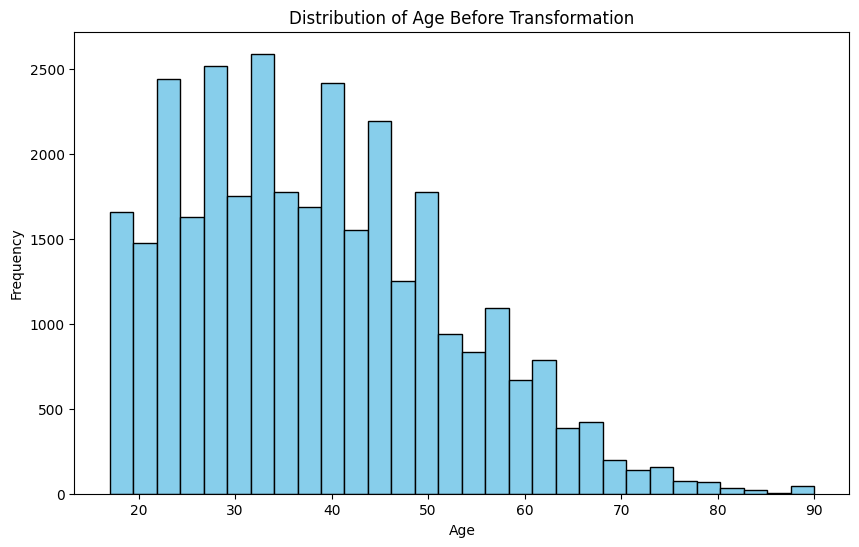

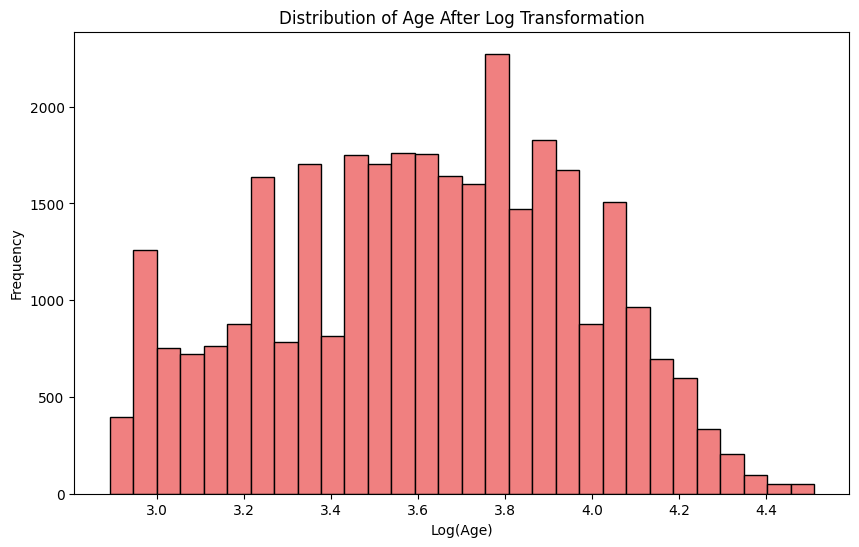

Applied log transformation to the 'age' feature to reduce skewness.


,age,age_log
0,39,3.688879
1,50,3.931826
2,38,3.663562
3,53,3.988984
4,28,3.367296


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze the distribution of the 'age' feature
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Age Before Transformation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Apply log transformation if the distribution is skewed
# Add a small constant to handle zero values
df_encoded['age_log'] = np.log1p(df_encoded['age'])

# Visualize the distribution after the log transformation
plt.figure(figsize=(10, 6))
plt.hist(df_encoded['age_log'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Age After Log Transformation')
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.show()

print("Applied log transformation to the 'age' feature to reduce skewness.")
display(df_encoded[['age', 'age_log']].head())

## Data preparation


Prepare the data for outlier detection and PPS analysis.



Create copies of the dataframe for outlier detection and PPS analysis, and select relevant features for each analysis.



In [9]:
# Create copies of the dataframe
df_outlier = df_encoded.copy()
df_pps = df_encoded.copy()

# Select numerical features for outlier analysis
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week',
                  'capital_net', 'education_hours_interaction', 'age_log']
df_outlier = df_outlier[numerical_cols]

# Select features for PPS analysis (all features except the target variable)
features_for_pps = df_pps.columns.tolist()
features_for_pps.remove('income')
df_pps = df_pps[features_for_pps + ['income']]

display(df_outlier.head())
display(df_pps.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,capital_net,education_hours_interaction,age_log
0,39,77516,13,2174,0,40,2174,520,3.688879
1,50,83311,13,0,0,13,0,169,3.931826
2,38,215646,9,0,0,40,0,360,3.663562
3,53,234721,7,0,0,40,0,280,3.988984
4,28,338409,13,0,0,40,0,520,3.367296


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,age_standard,fnlwgt_standard,education_num_standard,capital_gain_standard,...,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_ Male,native_country_encoded,capital_net,education_hours_interaction,age_log,income
0,39,77516,13,2174,0,40,0.030671,-1.063611,1.134739,0.148453,...,4,0,1,4,1,38,2174,520,3.688879,<=50K
1,50,83311,13,0,0,13,0.837109,-1.008707,1.134739,-0.145920,...,2,3,0,4,1,38,0,169,3.931826,<=50K
2,38,215646,9,0,0,40,-0.042642,0.245079,-0.420060,-0.145920,...,0,5,1,4,1,38,0,360,3.663562,<=50K
3,53,234721,7,0,0,40,1.057047,0.425801,-1.197459,-0.145920,...,2,5,0,2,1,38,0,280,3.988984,<=50K
4,28,338409,13,0,0,40,-0.775768,1.408176,1.134739,-0.145920,...,2,9,5,2,0,4,0,520,3.367296,<=50K


## Data clustering


Identify and remove outliers from the dataset using the Isolation Forest algorithm.



Use IsolationForest to identify and remove outliers from the numerical features in df_outlier, then filter df_encoded to keep only inliers.



In [10]:
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest model
model = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the numerical features
model.fit(df_outlier)

# Predict outlier labels
outlier_labels = model.predict(df_outlier)

# Filter the original dataframe to keep only inliers
df_no_outliers = df_encoded[outlier_labels == 1]

# Display the first few rows of the dataframe without outliers
display(df_no_outliers.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,age_standard,fnlwgt_standard,education_num_standard,...,education_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_ Male,native_country_encoded,capital_net,education_hours_interaction,age_log
0,39,77516,13,2174,0,40,<=50K,0.030671,-1.063611,1.134739,...,9,4,0,1,4,1,38,2174,520,3.688879
1,50,83311,13,0,0,13,<=50K,0.837109,-1.008707,1.134739,...,9,2,3,0,4,1,38,0,169,3.931826
2,38,215646,9,0,0,40,<=50K,-0.042642,0.245079,-0.420060,...,11,0,5,1,4,1,38,0,360,3.663562
3,53,234721,7,0,0,40,<=50K,1.057047,0.425801,-1.197459,...,1,2,5,0,2,1,38,0,280,3.988984
4,28,338409,13,0,0,40,<=50K,-0.775768,1.408176,1.134739,...,9,2,9,5,2,0,4,0,520,3.367296


## Data analysis


Calculate PPS scores and analyze feature relationships.


Calculate PPS scores, generate a correlation matrix, visualize it as a heatmap, and compare the results.



In [13]:
pip install ppscore

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.18620,77535.141544,DecisionTreeRegressor()
2,age,education_num,0.000000,regression,True,mean absolute error,1.85300,1.898306,DecisionTreeRegressor()
3,age,capital_gain,0.000000,regression,True,mean absolute error,1093.88400,2003.391960,DecisionTreeRegressor()
4,age,capital_loss,0.000000,regression,True,mean absolute error,94.94260,177.745741,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
895,income,native_country_encoded,0.000000,regression,True,mean absolute error,1.57920,2.881525,DecisionTreeRegressor()
896,income,capital_net,0.000000,regression,True,mean absolute error,1188.82660,1814.050336,DecisionTreeRegressor()
897,income,education_hours_interaction,0.076461,regression,True,mean absolute error,132.30660,122.190271,DecisionTreeRegressor()
898,income,age_log,0.044037,regression,True,mean absolute error,0.29267,0.279781,DecisionTreeRegressor()


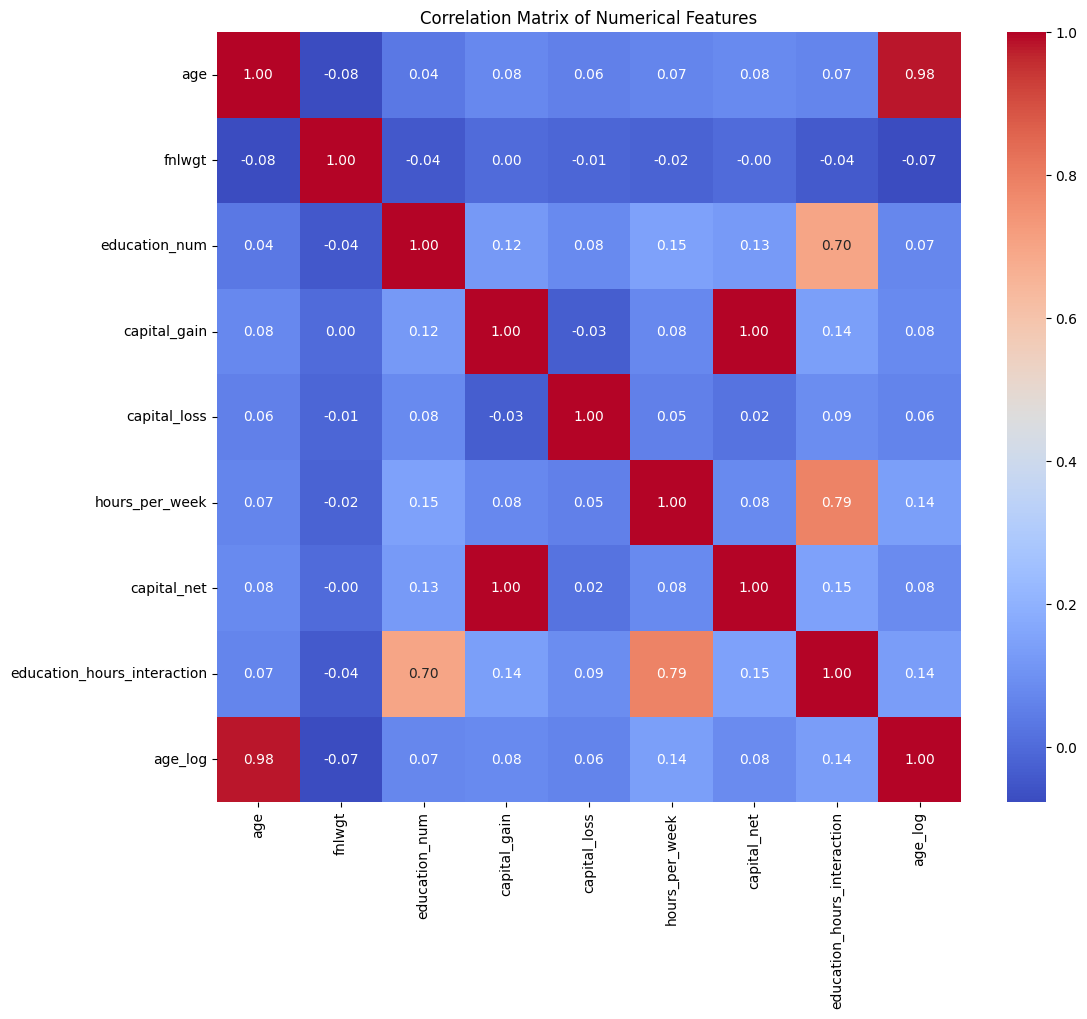

Comparison between PPS scores and correlation matrix:
- 'age' vs. 'income': PPS score = 0.01
- 'age' correlation with other numerical features: 
age                            1.000000
fnlwgt                        -0.076646
education_num                  0.036527
capital_gain                   0.077674
capital_loss                   0.057775
hours_per_week                 0.068756
capital_net                    0.080846
education_hours_interaction    0.068723
age_log                        0.981238
Name: age, dtype: float64


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps  # Correct way to import PPS

# Calculate PPS matrix
pps_matrix_result = pps.matrix(df_pps)
display(pps_matrix_result)

# Generate correlation matrix for numerical features
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'capital_net', 'education_hours_interaction', 'age_log']
correlation_matrix = df_pps[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Compare PPS scores with the correlation matrix
print("Comparison between PPS scores and correlation matrix:")

# Example comparison (expand to cover all features)
try:
    pps_score_age_income = pps_matrix_result[
        (pps_matrix_result['x'] == 'age') & (pps_matrix_result['y'] == 'income')
    ]['ppscore'].iloc[0]
    print(f"- 'age' vs. 'income': PPS score = {pps_score_age_income:.2f}")
except IndexError:
    print("- 'age' vs. 'income': PPS score not found in matrix.")

print(f"- 'age' correlation with other numerical features: \n{correlation_matrix['age']}")



## Summary:

### Data Analysis Key Findings

*   The dataset initially contained no missing values.
*   Categorical features with less than 5 unique values were One-Hot Encoded (e.g., `sex`), while those with 5 or more were Label Encoded (e.g., `workclass`, `education`).
*   Two new features were engineered: `capital_net` (sum of capital gain and loss) and `education_hours_interaction` (product of education number and hours per week).
*   A log transformation was applied to the `age` feature to reduce skewness, creating `age_log`.
*   Outliers were detected and removed from the numerical features using the Isolation Forest algorithm.

### Insights or Next Steps

*   We may proceed with training various machine learning models on the preprocessed, engineered, and outlier-removed dataset to predict income, evaluating the performance of models trained on data processed with different scaling and encoding techniques.
